In [2]:
import pandas as pd
data = pd.read_excel(r'whole_experiment\all_results_steady_ex.xlsx')

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
wake_up_and_its_over = ['#62B8CE','#605E04', '#E5510D','#885B59','#892203']
mammalian_sighting_reflex = ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#FCFCFC', '#bda5ad']

sns.set_palette(mammalian_sighting_reflex)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=mammalian_sighting_reflex)

In [16]:
melted_data = data.melt(id_vars=['layout', 'assortativity', 'graph_id', 'size'], 
                        value_vars=['AgglomerativeClustering', 'OPTICS', 'KMeans', 'GMM', 'Birch', 'Girvan-Newman', 'Leiden'], 
                        var_name='Method', 
                        value_name='Score')
melted_data.head()

,layout,assortativity,graph_id,size,Method,Score
0,kamada_kawai,0.948042,0,100,AgglomerativeClustering,0.697026
1,spring,0.948042,0,100,AgglomerativeClustering,0.797976
2,davidson_harel,0.948042,0,100,AgglomerativeClustering,0.644403
3,drl,0.948042,0,100,AgglomerativeClustering,0.586788
4,fruchterman_reingold,0.948042,0,100,AgglomerativeClustering,0.566239


# Plots

<Axes: xlabel='Method', ylabel='Score'>

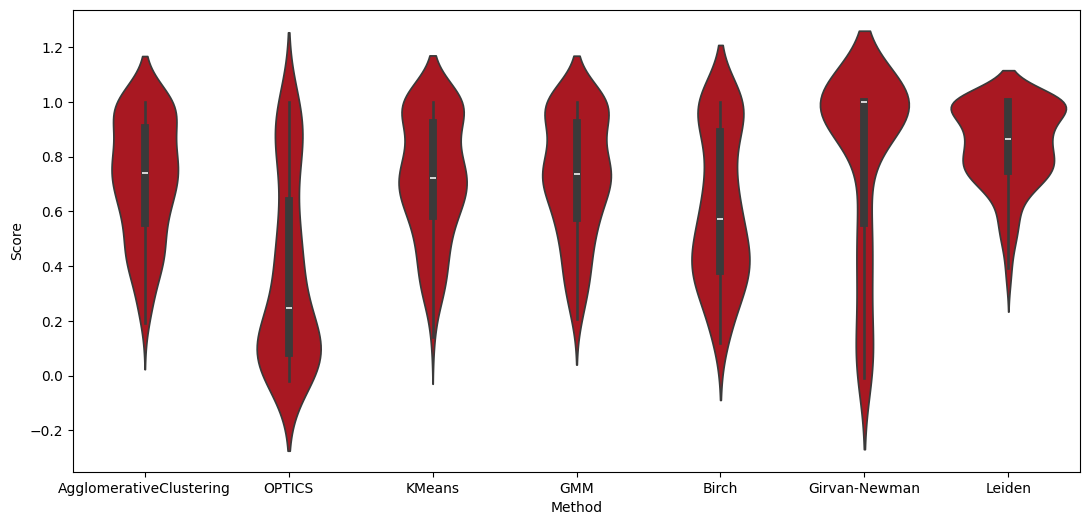

In [66]:
df = melted_data[melted_data['layout']=='spring']
plt.figure(figsize=(13, 6))
sns.violinplot(x="Method", y="Score", data=df )

C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\3998875199.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Method', y='Score', hue='layout', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\3998875199.py:5: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x='Method', y='Score', hue='layout', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)


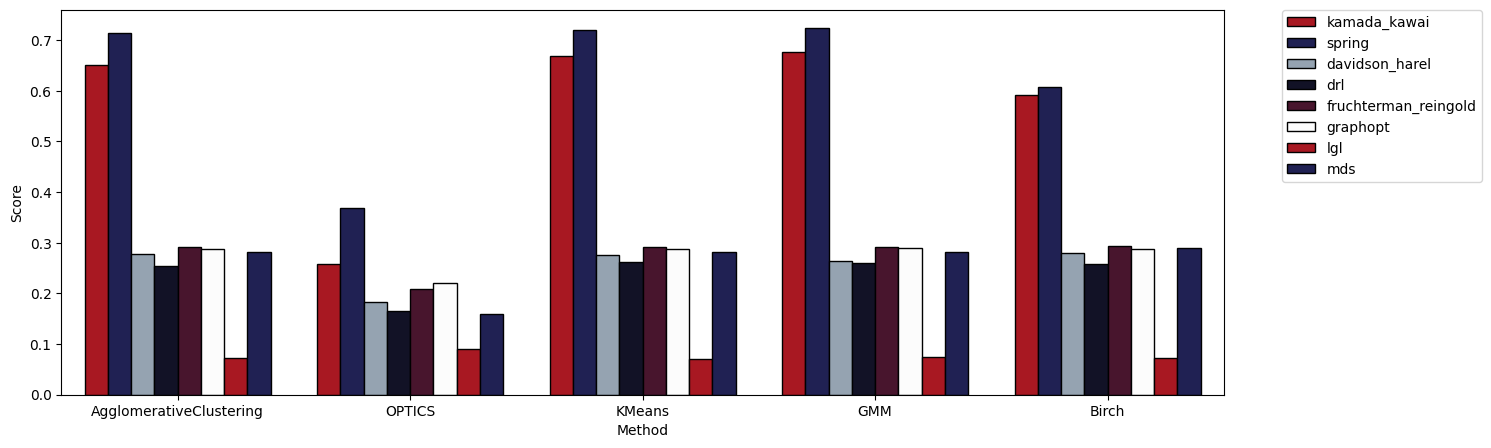

In [20]:
import numpy as np
plt.figure(figsize=(15, 5))

df = melted_data[~melted_data['Method'].isin(['Girvan-Newman', 'Leiden'])]
ax=sns.barplot(x='Method', y='Score', hue='layout', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
# general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\724888308.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='size', y='Score', hue='Method', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)


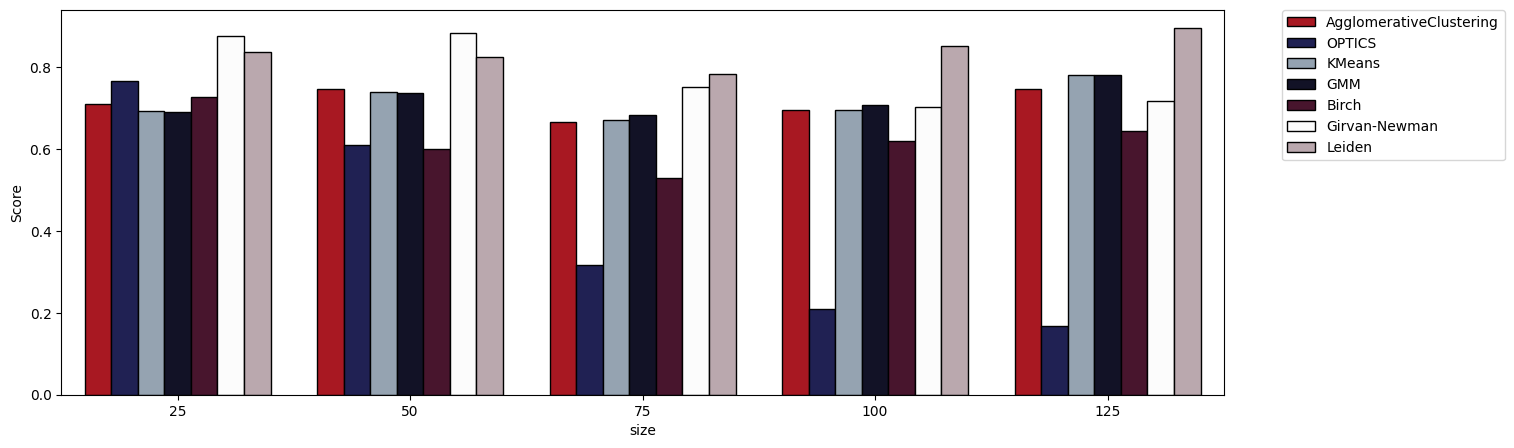

In [68]:
import numpy as np
plt.figure(figsize=(15, 5))

# df = melted_data[~melted_data['Method'].isin(['Girvan-Newman', 'Leiden'])]
df = melted_data[melted_data['layout']=='spring']

ax=sns.barplot(x='size', y='Score', hue='Method', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
# general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\1475742890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['assortativity_bin'] = pd.cut(df['assortativity'], bins=5)
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\1475742890.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='assortativity_bin', y='Score', hue='Method', data=df, estimator=np.mean, ci=False, palette=mammalian_sighting_reflex, edgecolor='black')
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\1475742890.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.l

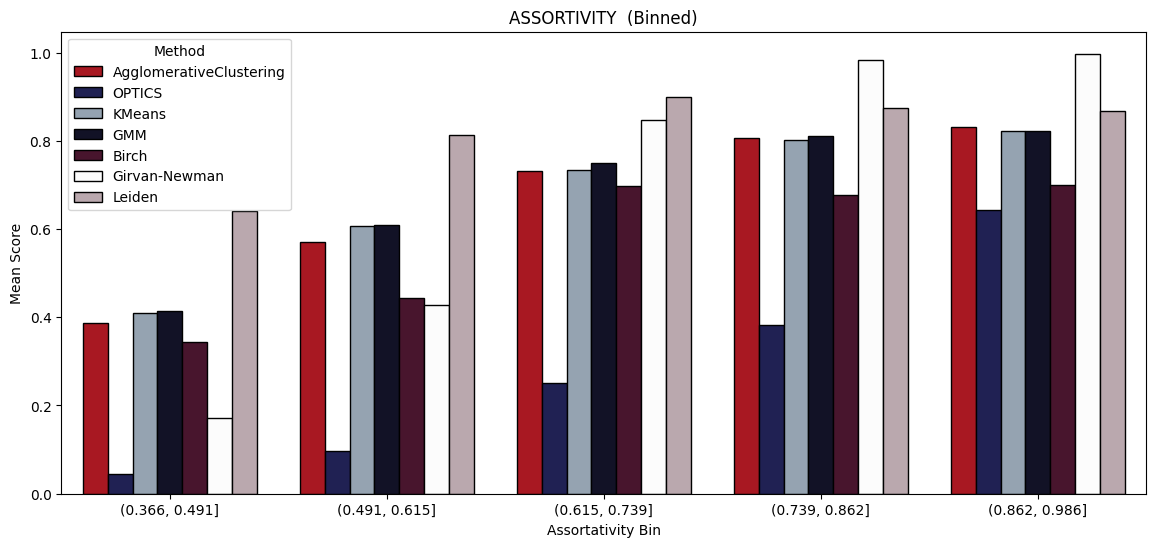

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
df = melted_data[melted_data['layout'] == 'spring']
# df = df[df['assortativity'] < .5]

# Bin the 'assortativity' values into 4 bins
df['assortativity_bin'] = pd.cut(df['assortativity'], bins=5)

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='assortativity_bin', y='Score', hue='Method', data=df, estimator=np.mean, ci=False, palette=mammalian_sighting_reflex, edgecolor='black')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("ASSORTIVITY  (Binned)")
plt.xlabel('Assortativity Bin')
plt.ylabel('Mean Score')
plt.legend(title='Method')
plt.show()

C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\1922975951.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)


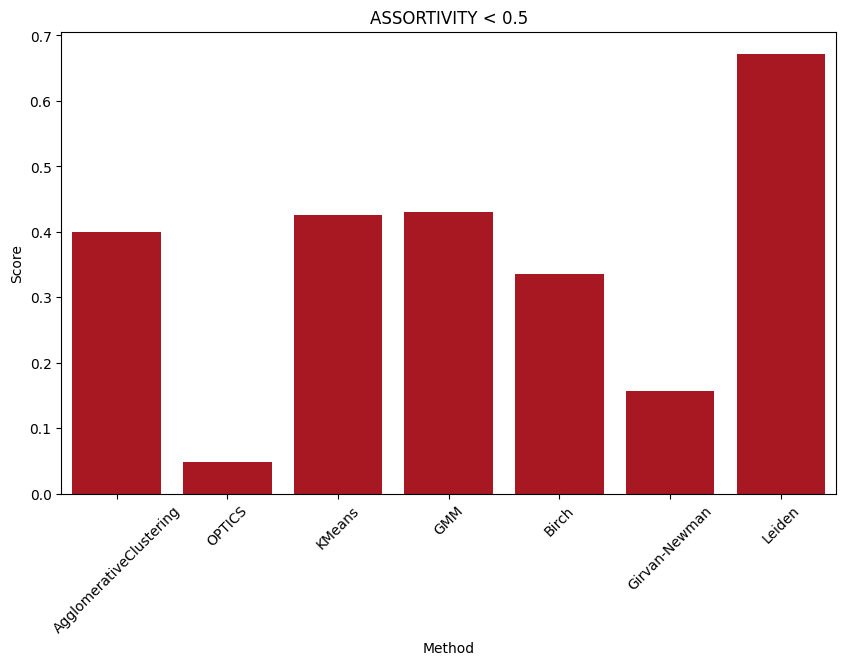

In [51]:
plt.figure(figsize=(10, 6))
df = melted_data[melted_data['layout']=='spring']
df = df[df['assortativity'] < .5]
sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if neede
plt.title("ASSORTIVITY < 0.5")
plt.show()

C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\1114908810.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)


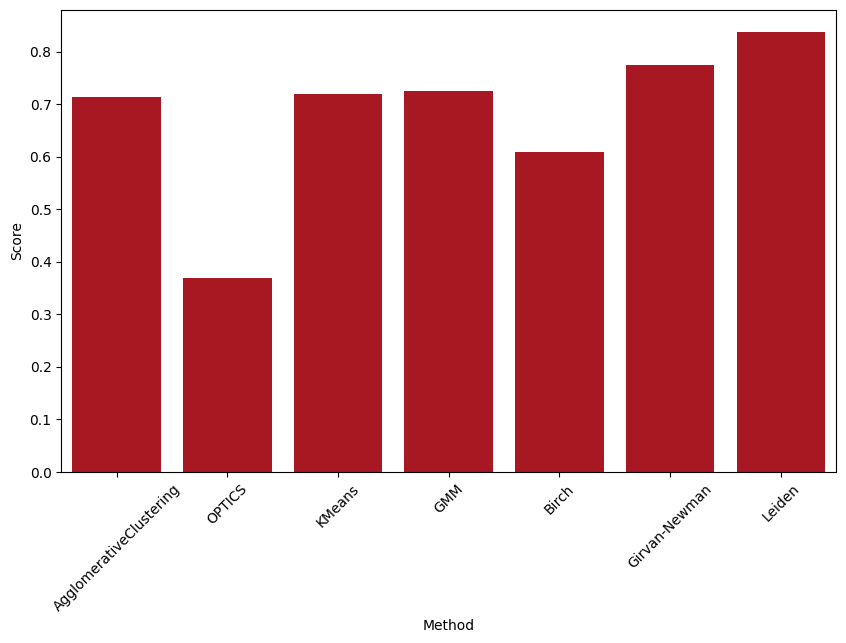

In [24]:
plt.figure(figsize=(10, 6))
df = melted_data[melted_data['layout']=='spring']
sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if neede
plt.show()

In [26]:
df.columns

Index(['layout', 'assortativity', 'graph_id', 'size', 'Method', 'Score'], dtype='object')

C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\1757776232.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(x='assortativity', y='Score', hue='Method', data=df, palette=mammalian_sighting_reflex)


<Axes: xlabel='assortativity', ylabel='Score'>

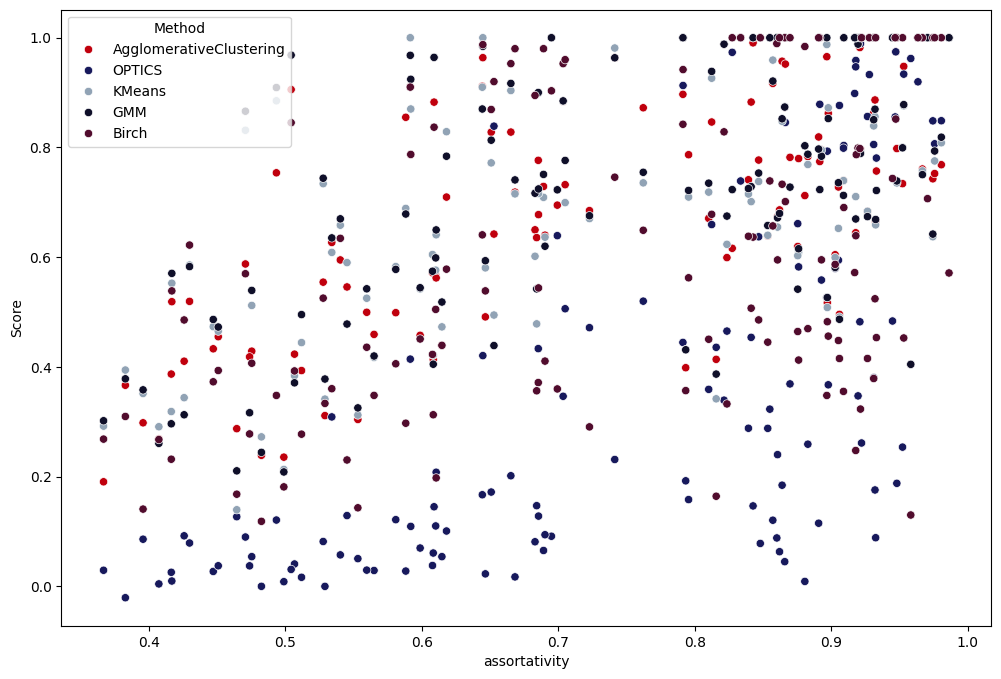

In [35]:

# Create scatter plot
plt.figure(figsize=(12, 8))
df = melted_data[melted_data['layout']=='spring']
df = df[~df['Method'].isin(['Girvan-Newman', 'Leiden'])]
sns.scatterplot(x='assortativity', y='Score', hue='Method', data=df, palette=mammalian_sighting_reflex)

# Customize the plot

C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\77692273.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\77692273.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\77692273.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15092\77692273.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_s

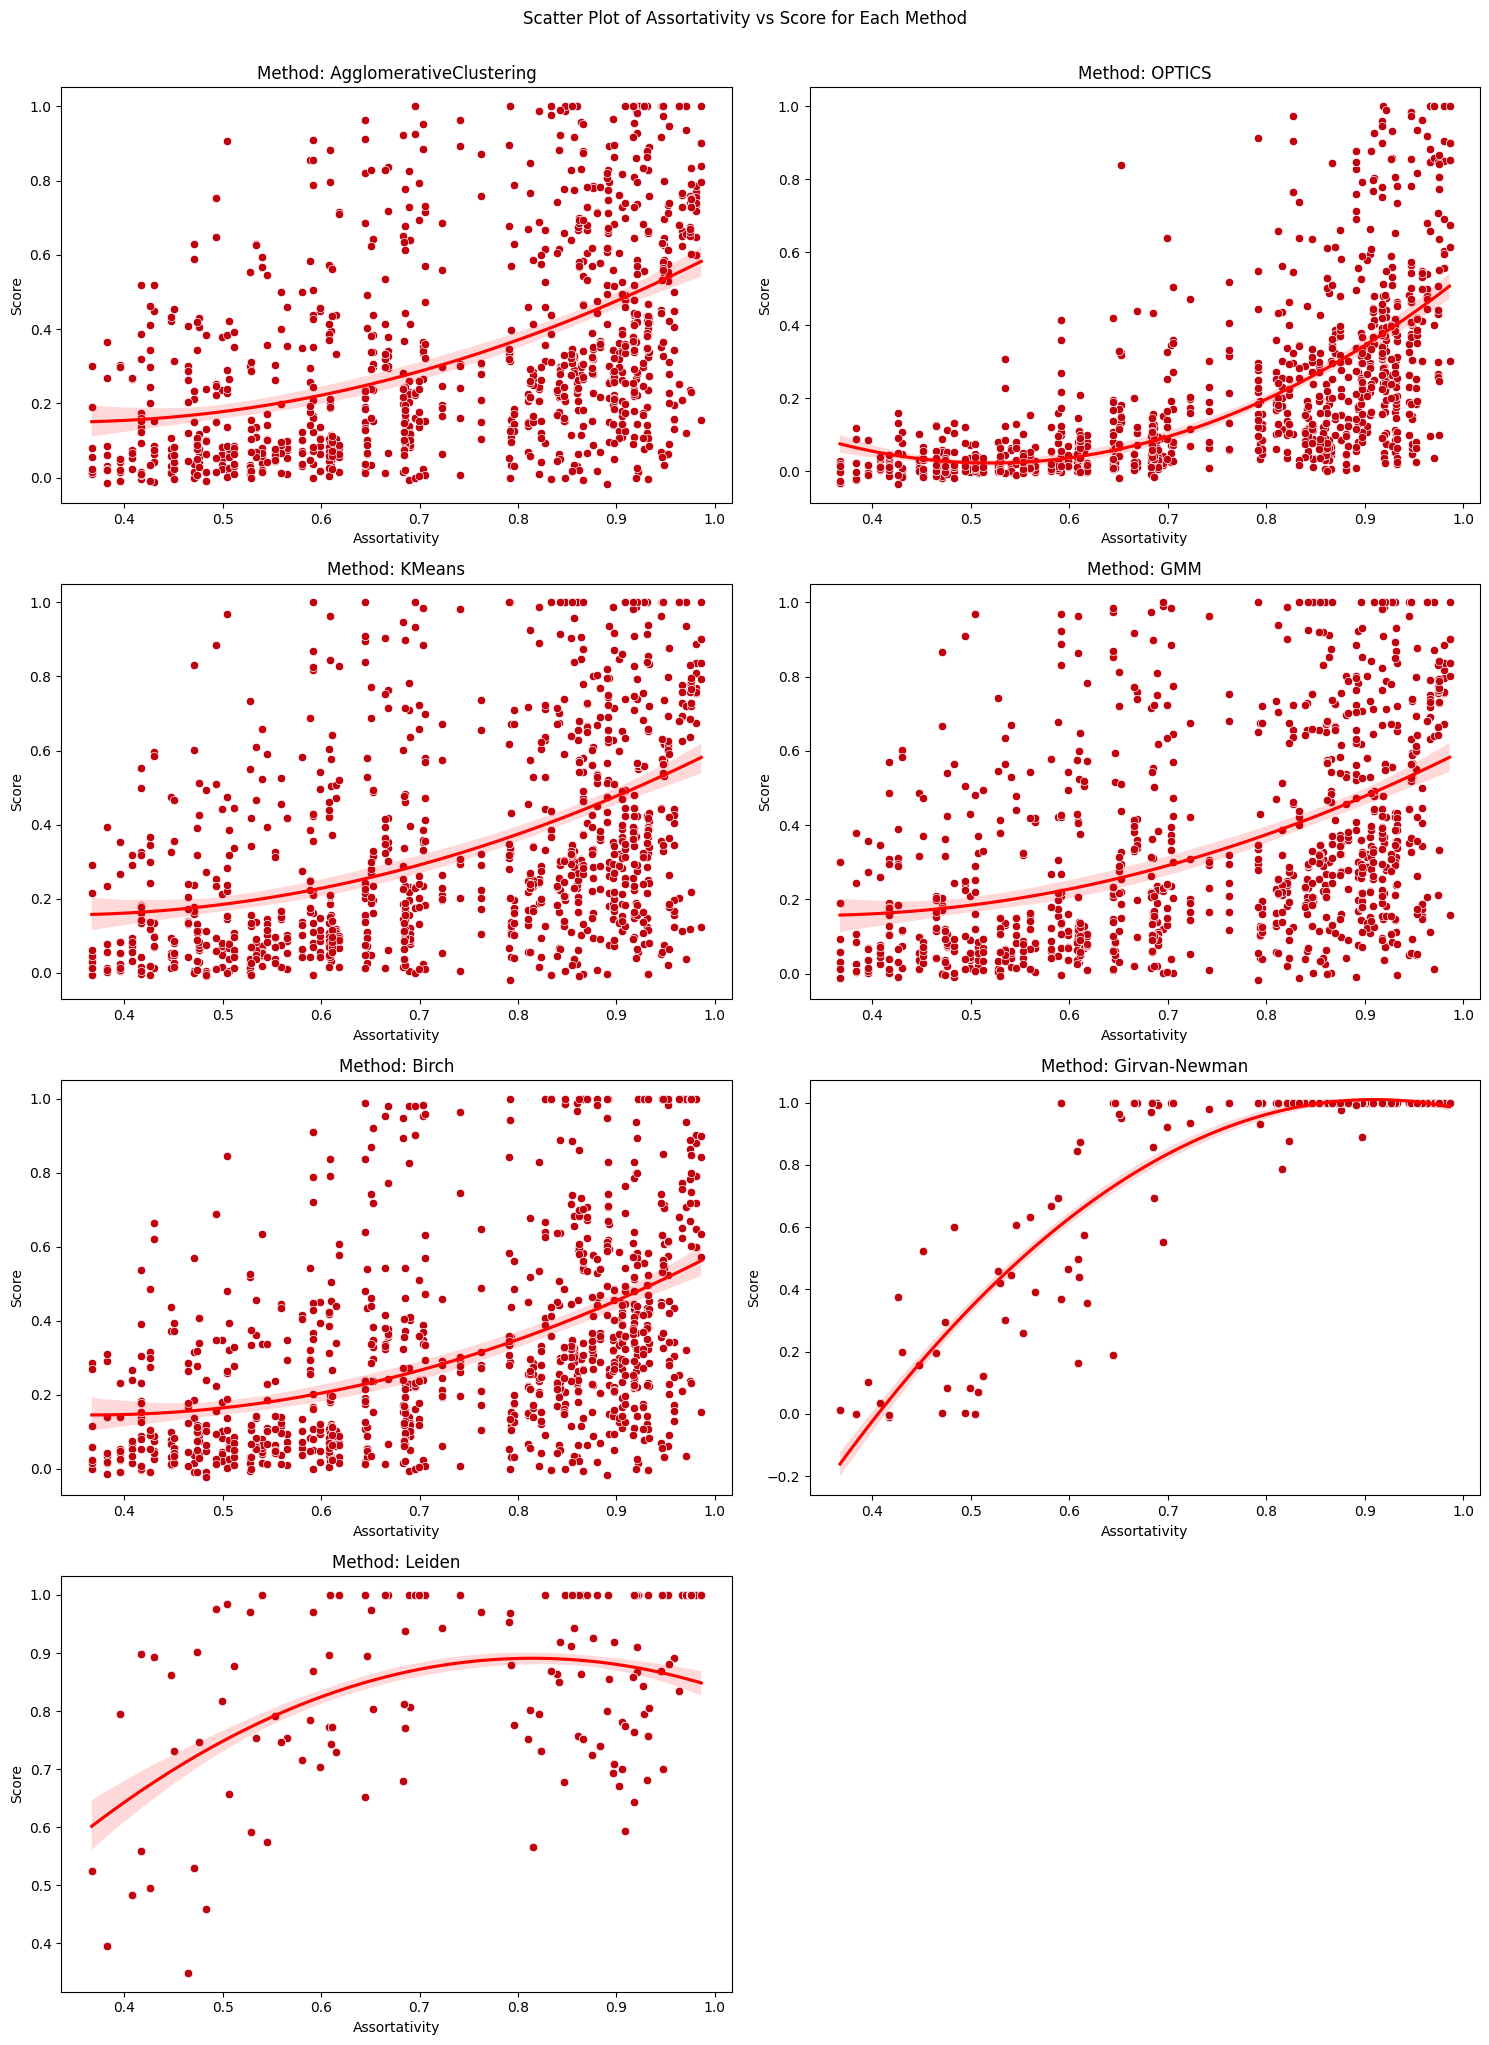

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
# df = melted_data[melted_data['layout'] == 'spring']
# df = df[~df['Method'].isin(['Girvan-Newman', 'Leiden'])]
df = melted_data.copy(deep=True)
# Get unique methods
methods = df['Method'].unique()

# Create subplots
num_methods = len(methods)
fig, axes = plt.subplots(nrows=(num_methods + 1) // 2, ncols=2, figsize=(15, 5 * ((num_methods + 1) // 2)))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each method in a separate subplot
for ax, method in zip(axes, methods):
    method_data = df[df['Method'] == method]
    sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
    sns.regplot(x='assortativity', y='Score', data=method_data, ax=ax, scatter=False, color='red', order=2)
    ax.set_title(f'Method: {method}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Score')

# Remove any empty subplots
for i in range(len(methods), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plot of Assortativity vs Score for Each Method', y=1.02)
plt.show()

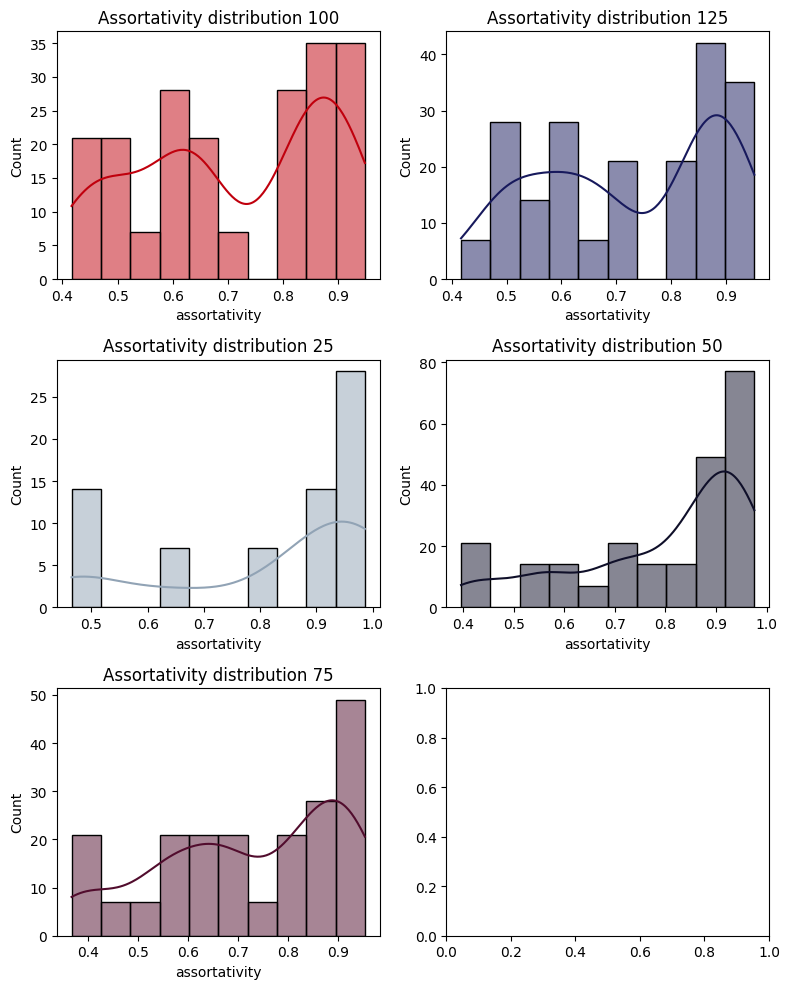

In [70]:
palette_dict = dict(zip(df['size'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()
unique_algos = df['size'].unique()

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df[df['size'] == algo]
    sns.histplot(data=subset, x='assortativity', bins=10, kde=True, ax=ax, color=palette_dict[algo])
    # Customize the subplot
    ax.set_title(f'Assortativity distribution {algo}')
    ax.set_xlabel('assortativity')
    # ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

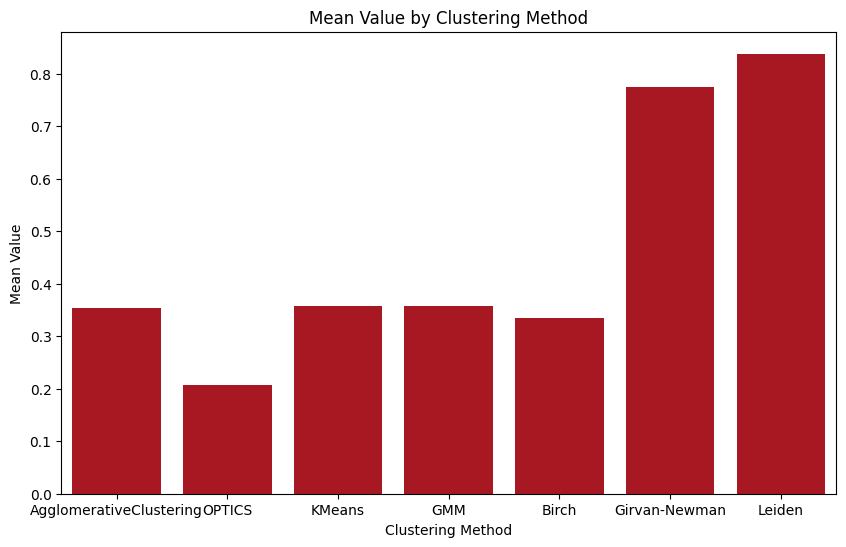

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clusters_columns = ['AgglomerativeClustering', 'OPTICS', 'KMeans', 'GMM', 'Birch', 'Girvan-Newman', 'Leiden']
melted_data = data.melt(value_vars=clusters_columns, 
                        var_name='Method', 
                        value_name='Score')
mean_values = melted_data.groupby('Method')['Score'].mean().reset_index()
mean_values['Method'] = pd.Categorical(mean_values['Method'], categories=clusters_columns, ordered=True)
mean_values = mean_values.sort_values('Method')
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Score', data=mean_values)
plt.show()

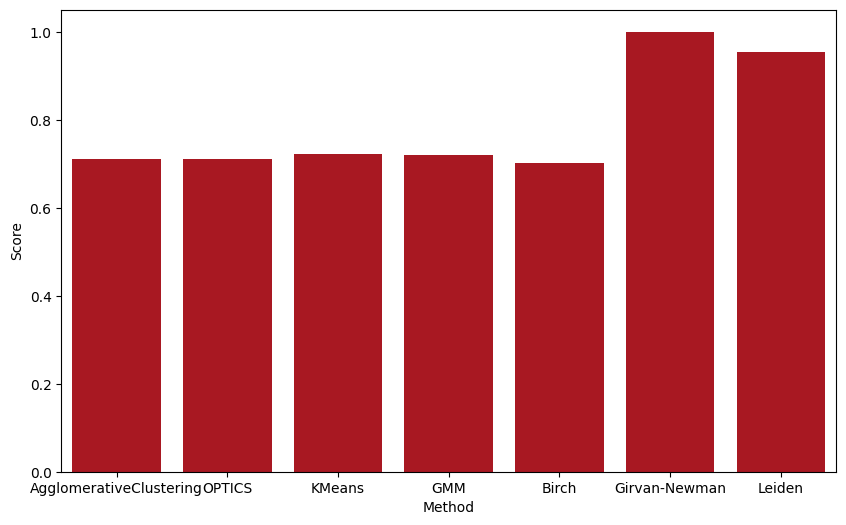

In [15]:
df = data[data['assortativity']>.9]
df = df[df['size']==25]
clusters_columns = ['AgglomerativeClustering', 'OPTICS', 'KMeans', 'GMM', 'Birch', 'Girvan-Newman', 'Leiden']
melted_data = df.melt(value_vars=clusters_columns, 
                        var_name='Method', 
                        value_name='Score')
mean_values = melted_data.groupby('Method')['Score'].mean().reset_index()
mean_values['Method'] = pd.Categorical(mean_values['Method'], categories=clusters_columns, ordered=True)
mean_values = mean_values.sort_values('Method')
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Score', data=mean_values)
plt.show()